In [4]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Data Read

In [5]:
df=pd.read_csv("D:/Games/cardiocology/CTG.csv")

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

In [7]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

In [9]:
# Drop unnecessaries
df=df.drop(["FileName","Date","SegFile","b","e","A", "B","C", "D" ,"E", "AD", "DE" ,"LD", "FS", "SUSP"],axis=1)

In [10]:
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [11]:
# Coloumns names
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

In [12]:
df.shape

(2129, 25)

In [13]:
df.isnull().sum()

LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [14]:
# process to delete all nan data
df = df.dropna()

In [15]:
df.isnull().sum()

LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

In [16]:
df.dtypes

LBE         float64
LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
CLASS       float64
NSP         float64
dtype: object

In [17]:
# This dataset can be used for both 10-class classifications and 3-class classifications.
# Selecting the data to be used for the 3-class model
X=df.drop(["NSP","CLASS"],axis=1)

y=df["NSP"]

In [18]:
X.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [19]:
nsp_classes = y.unique()
nsp_classes

array([2., 1., 3.])

In [20]:
# For Multi Outputs
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


# label encoder y
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [21]:
y.shape

(2126, 3)

In [22]:
# Data Standardization with Standard Scaler
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

X[0:3]

X.shape

(2126, 23)

## Modelling

In [23]:
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [24]:
# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

# Setting up a primitive (non-validated) model
mlpc = MLPClassifier(random_state = 0)# ANN model object created

mlpc.fit(X_train, y_train) # ANN model object fit


MLPClassifier(random_state=0)

In [25]:
# Forecasting on the Unvalidated Model
y_pred = mlpc.predict(X_test) # model prediction process over test set

In [26]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# f1 score

print("f1_weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.9014084507042254
f1_weighted: 0.918762214585478


## Grid Search Cross Validation

In [27]:
# Cross Validation Process
# Parameters for CV created in dictionary structure
# INFORMATION ABOUT THE INPUTED PARAMETERS
# alpha: float, default = 0.0001 L2 penalty (regularization term) parameter. (penalty parameter)
   
mlpc_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

from sklearn.model_selection import GridSearchCV




mlpc = MLPClassifier(random_state = 0) # ANN model object created

# Model CV process 
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlpc_cv_model.fit(X_train, y_train) 


# The best parameter obtained as a result of CV process

print("The best parameters: " + str(mlpc_cv_model.best_params_))




Fitting 5 folds for each of 54 candidates, totalling 270 fits
The best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [28]:
# Model Tuning
# Setting the Final Model with the best parameter

mlpc_tuned = mlpc_cv_model.best_estimator_

# Fitting Final Model
mlpc_tuned.fit(X_train, y_train)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), random_state=0)

In [29]:
# K-fold f1_weighted

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = cross_val_score(mlpc_tuned, X_test, np.argmax(y_test, axis=1), cv=kf, scoring= 'f1_weighted')

print("K-fold Cross Validation f1_weigted Results: ",cv_results_kfold)
print("K-fold Cross Validation f1_weigted Results Mean: ",cv_results_kfold.mean())

K-fold Cross Validation f1_weigted Results:  [0.77962461 0.88588235 0.80706454 0.95347307 0.86395892]
K-fold Cross Validation f1_weigted Results Mean:  0.8580006974564537


In [30]:
# K-fold accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = cross_val_score(mlpc_tuned, X_test, np.argmax(y_test, axis=1), cv=kf, scoring= 'accuracy')

print("K-fold Cross Validation accuracy Results: ",cv_results_kfold)
print("K-fold Cross Validation accuracy Results Mean: ",cv_results_kfold.mean())

K-fold Cross Validation accuracy Results:  [0.86046512 0.95294118 0.78823529 0.88235294 0.87058824]
K-fold Cross Validation accuracy Results Mean:  0.8709165526675786


In [31]:
# Tune Model Prediction
# Prediction process of Final Model over test set
y_pred = mlpc_tuned.predict(X_test)

In [32]:
# Accuracy and f1_weighted value of Final Model

# %% f1 score
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),average='weighted'))

# %% Accuracy

print("accuracy:",metrics.accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

f1_weighted: 0.9118176847496193
accuracy: 0.9131455399061033


In [33]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_report)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       326
           1       0.75      0.71      0.73        58
           2       0.92      0.81      0.86        42

    accuracy                           0.91       426
   macro avg       0.87      0.83      0.85       426
weighted avg       0.91      0.91      0.91       426



In [34]:
# Confusion Matrix
# multilabel-indicator is not supported so np.argmax should be used!
model_conf = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_conf)

[[314  10   2]
 [ 16  41   1]
 [  4   4  34]]


In [35]:
#%% ROC-AUC Curve

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

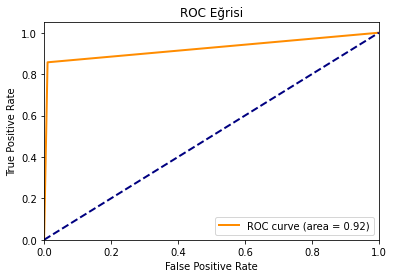

In [36]:
# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 3. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

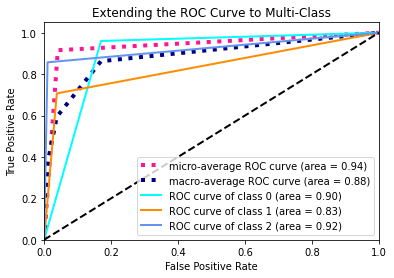

In [37]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()